# Analysis of Employee Exit Surveys

The objective of this report is to analyse employee exit survey data from the [Department of Education, Training and Employment (DETE)](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and the [Technical and Further Education (TAFE)](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) institute in Queensland, Australia to answer the following questions:
1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?;
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Lets start by exploring the datasets.

In [3]:
#Import pandas and numpy
import pandas as pd
import numpy as np
#Read files
dete_survey = pd.read_csv("/Users/katestone/Desktop/CSV files/dete_survey.csv", encoding="mac_roman")
tafe_survey = pd.read_csv("/Users/katestone/Desktop/CSV files/tafe_survey.csv", encoding="mac_roman")

# TAFE data

In [15]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. ††††What is your Gender?,CurrentAge. ††††Current Age,Employment Type. ††††Employment Type,Classification. ††††Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 ñ 30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 ñ 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [16]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null int64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-nu

TAFE data observations:

- 702 entries;
- 72 columns some of which we don't need;
- Multiple columns/answers that indicate an employee resigned because they were dissatisfied;
- A number of columns contain null values;
- Particularly interested in "LengthofServiceOverall..", "Reason for ceasing employment", "CurrentAge.." columns.

# DETE Data

In [17]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [18]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

DETE data observations:
- 822 entries (slightly bigger than the TAFE dataset);
- 56 columns, some of which we don't need;
- Multiple columns/answers that indicate an employee resigned because they were dissatisfied;
- A number of columns contain null values;
- Particularly interested in "SeparationType", "Cease Date", "DETE Start Date" and "Age" columns;
- Dataframe contains "Not Stated" values that indicates values are missing but they are not represented as NaN.

# Drop Columns and Identify Missing Values

Lets start the cleaning process by removing unnecessary columns from each data set and fixing the values listed as "Not Stated" in the DETE dataset.

In [6]:
#Re-read DETE dataset without "Not Stated" values
dete_survey = pd.read_csv("/Users/katestone/Desktop/CSV files/dete_survey.csv", encoding="mac_roman", na_values = "Not Stated")
#Remove unnecessary columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
Record ID                                                                    702 non-null int64
Institute                                                                    702 non-null object
WorkArea                                                                     702 non-null object
CESSATION YEAR                                                               695 non-null float64
Reason for ceasing employment                                                701 non-null object
Contributing Factors. Career Move - Public Sector                            437 non-null object
Contributing Factors. Career Move - Private Sector                           437 non-null object
Contributing Factors. Career Move - Self-employment                          437 non-null object
Contributing Factors. Ill Health                                             437 non-null object
Contributing Factors. 

# Rename the Columns

Each dataframe contains many of the same columns, but the names are different. Because the goal is to eventually combine them the columns names will need to be standardised.

In [7]:
#Update column names in the DETE dataset
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(" ", "_").str.lower().str.strip()
#Update column names in the TAFE dataset
tafe_survey_columns = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype',
                       'Gender. ††††What is your Gender?': 'gender', 'CurrentAge. ††††Current Age': 'age', 
                       'Employment Type. ††††Employment Type': 'employment_status', 'Classification. ††††Classification': 'position', 
                       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 
                       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(tafe_survey_columns, axis = 1)

# Filter the Data Based on Separation Type

Seeing as the only employees of interest are those who have resigned, the data will be filtered by the "separationtype" column and only rows which contain the string "Resigned" will be kept.

In [8]:
#Check values in separationtype column for each dataframe
print(dete_survey_updated["separationtype"].value_counts())
print('\n')
print(tafe_survey_updated["separationtype"].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [9]:
#Group all resignation under "Resignation" in DETE dataframe
dete_survey_updated["separationtype"] = dete_survey_updated["separationtype"].str.split("-").str.get(0)
#Check
dete_survey_updated["separationtype"].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [10]:
#Filter the data for each keep relevant data under new variables
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"] == "Resignation"].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

# Identify Bad Date Data

Next, the date data will be inspected to make sure the entries are realistic and formatted correctly.

In [11]:
#Check date data
print(dete_resignations["cease_date"].value_counts())
print("\n")
print(dete_resignations["dete_start_date"].value_counts())
print("\n")
print(tafe_resignations["cease_date"].value_counts())

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64


2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64


2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64


In [12]:
# Extract the years and convert them to a float type
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str.get(-1)
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

# Check the values again and look for outliers
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

# Calculate Length of Service

One of the objectives is to uncover whether a link exists between length of service and resignations due to dissatisfaction. To answer this the length of service for the DETE dataframe will need to be calculated.

In [13]:
#Create "institute_service" column in dete_resignations
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

#Check result
dete_resignations["institute_service"].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

# Identify Resignations due to Dissatisfaction

Employees who left due to dissatisfcation will be identified in a new column. To do this, data from the following columns will be pulled:

DETE:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

TAFE:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

In [14]:
#TAFE data
#Check values
print(tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(dropna=False))
print(tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [15]:
#Create function to identify values as True, False, NaN
def update_vals(val):
    if val == "-":
        return False
    elif pd.isnull(val):
        return np.nan
    else:
        return True
    
#Apply function to columns in tafe_resignations
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 
                   "Contributing Factors. Job Dissatisfaction"]].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

#Check values after updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [16]:
#Combine dissatisfaction data in dete_resignations into one column
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
#Check values
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

# Combine the Data

Before combining the data, an "institute" column will be added to each dataset to differentiate between the institutes.

In [17]:
#Add new institute column in each dataframe
dete_resignations_up['institute'] = "DETE"
tafe_resignations_up['institute'] = "TAFE"

In [20]:
# Combine the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True, sort=False)

# Verify the number of non null values in each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

In [21]:
#Drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

# Modify Length of Service Column

At the moment the institute_service column in each dataset contains lots of different values. Before we can begin to draw any meaningful insights from this data we'll need to group the data into the following categories:
- Less than 3 years of service = "New"
- 3 to 6 years of servce = "Experienced"
- 7 to 10 years of service = "Established"
- Over 11 years of service = "Veteran"

In [22]:
#Check the unique values
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


In [24]:
#Extract years of service
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype("str").str.extract(r"(\d+)", expand=False)
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

#Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [25]:
# Convert years of service to categories
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

# Quick check of the update
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

# Connection between Service Length and Dissatisfaction

Now the dissatisfaction and length of service data has been compiled, lets explore whether or not a link exists between the two.

First, the NaN values in the dissatisfaction column will be assigned as "False", the most frequently occuring value.

In [26]:
#Verify the unique values
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [27]:
# Replace missing values with the most frequent value, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

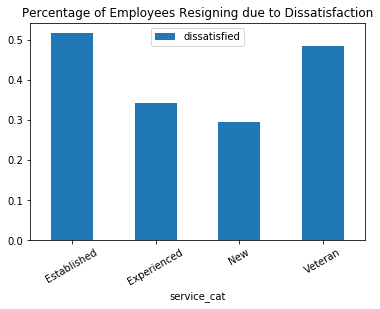

In [29]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# Plot the results
import matplotlib.pyplot as plt
%matplotlib inline
dis_pct.plot(kind='bar', rot=30, title="Percentage of Employees Resigning due to Dissatisfaction")
plt.show()

It would appear that employees who spend longer working at each institue are more likely to resign due to dissatisfaction than new employees. Lets compare each institute side by side and see if the trend remains the same. 

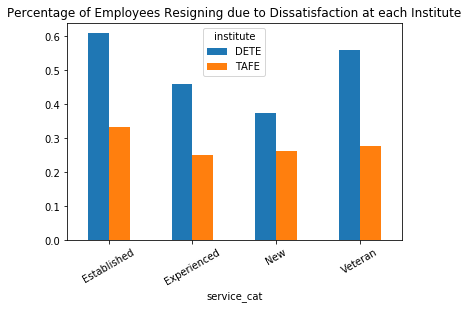

In [30]:
#Calculate the percentage of employees who resigned due to dissatisfaction in each category at each institute
dis_pct_2 = combined_updated.pivot_table(index='service_cat', values='dissatisfied', columns="institute")

# Plot the results
dis_pct_2.plot(kind='bar', rot=30, title="Percentage of Employees Resigning due to Dissatisfaction at each Institute")
plt.show()

Comparing the institutes side by side we can see a similar trend. However, outgoing employees from DETE appear to be resigning due to dissatisfaction far more frequently. 

# Connection between Age and Dissatisfaction

Next, lets explore whether there is a connection between age and resignations due to dissatisfaction. First, the age column will need cleaning.

In [31]:
#Check unique values
combined_updated["age"].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41 ñ 45          45
46-50            42
36-40            41
46 ñ 50          39
26-30            35
21 ñ 25          33
26 ñ 30          32
31 ñ 35          32
36 ñ 40          32
31-35            29
56 or older      29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [32]:
#Extract age as two digit number from age column
combined_updated["age"] = combined_updated["age"].astype("str").str.extract(r"(\d+)", expand=False)
combined_updated["age"] = combined_updated["age"].astype("float")
combined_updated["age"].value_counts(dropna=False)

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
NaN     55
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

In [33]:
#Create function to split ages into buckets
def update_age(age):
    if pd.isnull(age):
        return np.nan
    elif age <= 30:
        return "20-30"
    elif 30 < age <= 40:
        return "31-40"
    elif 40 < age <= 50:
        return "41-50"
    else:
        return "51+"

combined_updated["age_bucket"] = combined_updated["age"].apply(update_age)
#Check values
combined_updated["age_bucket"].value_counts(dropna=False)

41-50    174
51+      149
20-30    139
31-40    134
NaN       55
Name: age_bucket, dtype: int64

There are still 55 NaN values that need to be dealt with. One option could be to assign them to the 41-50 bracket as it occurs the most frequently, but this may result in drawing inaccurate conclusions. To be safe, these values will be filed under "Unknown".

In [34]:
combined_updated["age_bucket"] = combined_updated["age_bucket"].fillna("Unknown")
combined_updated["age_bucket"].value_counts(dropna=False)

41-50      174
51+        149
20-30      139
31-40      134
Unknown     55
Name: age_bucket, dtype: int64

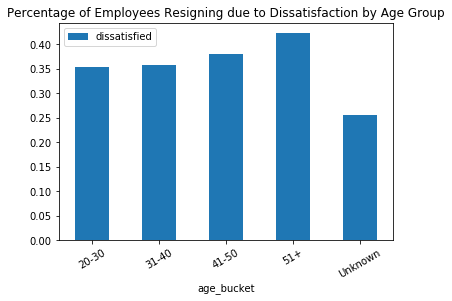

In [36]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each age bucket
dis_pct_age = combined_updated.pivot_table(index='age_bucket', values='dissatisfied')

# Plot the results
dis_pct_age.plot(kind='bar', rot=30, title="Percentage of Employees Resigning due to Dissatisfaction by Age Group")
plt.show()

The age bracket with the highest percentage of resigniations due to dissatisfication is the 51+ bracket at just over 40%. However, this is not much higher than the bracket with the lowest percentage (not including "Unknown") which sits at around 35%. Lets compare the institutions side by side.

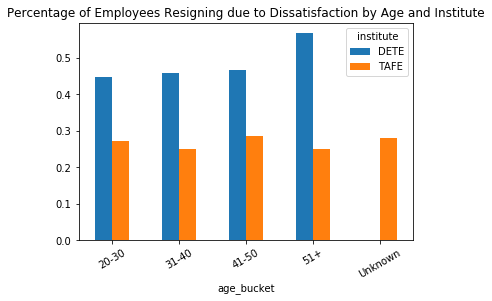

In [37]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each age bucket at each institute
dis_pct_age_2 = combined_updated.pivot_table(index="age_bucket", values="dissatisfied", columns="institute")

# Plot the results
dis_pct_age_2.plot(kind='bar', rot=30, title="Percentage of Employees Resigning due to Dissatisfaction by Age and Institute")
plt.show()

Comparing the institutions side by side reveals a different picture. The proportion of resiginations due to dissatisfication is higher for the 51+ age group compared to other groups in the DETE dataset. There is not much variation amoung age groups resigning due to dissatisfaction in the TAFE dataset. Again, it seems that employees at DETE are resigning due to dissatification far more frequently compared to those at TAFE.

# Conclusions

From the above analysis we can draw the following conclusions:
- Employees from DETE are resigning due to dissatisfaction far more frequently than those at TAFE;
- Employees who spend longer working at each institue are more likely to resign due to dissatisfaction than new employees;
- The proportion of resiginations due to dissatisfication is higher for the 51+ age group compared to other groups in the DETE dataset;
- All age groups in the TAFE dataset have similar proportions of employees resigning due to dissatisfaction.